# sommelier.ai instructors messy idea notebook

Start:
- explain notebooks and show how variables live between cells
- show how the last element is displayed and how ; suppresses theat
- show shift-tab and ?
- talk about the data journey and experimentation as core part of ML workflow

Data exploration:
- head, tail, loc, iloc, columns

In [1]:
# These 'magics' alter the behavior of the Jupyter notebook
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('.\\data\\winemag-data.zip')
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,This wine's aromas are vibrant and fruit forwa...,NaN,91,29.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Baer 2014 Malbec (Columbia Valley (WA)),Malbec,Baer
1,US,If you're curious about California Grenache Bl...,Tourmaline,88,24.0,California,Santa Ynez Valley,Central Coast,NaN,NaN,Coghlan 2010 Tourmaline Grenache Blanc (Santa ...,Grenache Blanc,Coghlan
2,France,"While the acidity is intense, it is balanced b...",NaN,84,15.0,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de Roche Guillon 2013 Beaujolais-Vill...,Gamay,Domaine de Roche Guillon
3,France,Red fruits and a soft tannic profile give a re...,NaN,88,17.0,Southwest France,Cahors,NaN,Roger Voss,@vossroger,Domaine de Cause 2011 Malbec (Cahors),Malbec,Domaine de Cause
4,Spain,Shows true Priorat depth and minerality while ...,Balcons,90,60.0,Catalonia,Priorat,NaN,Michael Schachner,@wineschach,Pinord 2004 Balcons Red (Priorat),Red Blend,Pinord


### Loc example

In [3]:
df.loc[(df.province == 'Washington') & (df.points > 98)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
58548,US,Initially a rather subdued Frog; as if it has ...,Bionic Frog,100,80.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Cayuse
94349,US,In 2005 Charles Smith introduced three high-en...,Royal City,100,80.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith
106271,US,The flagship wine from Quilceda Creek offers e...,NaN,99,125.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Quilceda Creek 2008 Cabernet Sauvignon (Columb...,Cabernet Sauvignon,Quilceda Creek


In [4]:
df.iloc[45]

country                                                        New Zealand
description              This is a sexy wine from one of New Zealand's ...
designation                                             Rippon Mature Vine
points                                                                  92
price                                                                   68
province                                                     Central Otago
region_1                                                               NaN
region_2                                                               NaN
taster_name                                                            NaN
taster_twitter_handle                                                  NaN
title                    Rippon 2011 Rippon Mature Vine Pinot Noir (Cen...
variety                                                         Pinot Noir
winery                                                              Rippon
Name: 45, dtype: object

## How are wines scored?

In [37]:
df.points.describe()

count    116973.000000
mean         88.446539
std           3.038423
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

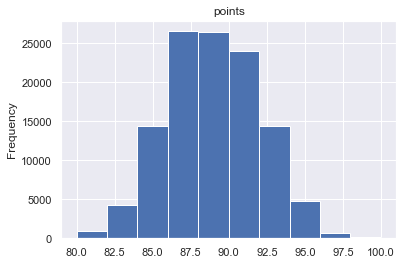

In [10]:
df.points.plot.hist(title='points');

## Data Challenges
- what are the worst wines in the US?
- how many tasters are there?
- how long are the descriptions?
- what are the top 20 wineries by number of wines? how do their points compare?
- what is the most produced variety?
- what is hightest rated variety?
- what are the most controversial wine varieties?
- are some tasters pickier than others?
- what are the top 10 best value wines?
- given a taster, what are their favorite varieties?

In [6]:
top20 = df.winery.value_counts(dropna=False)[:20].index

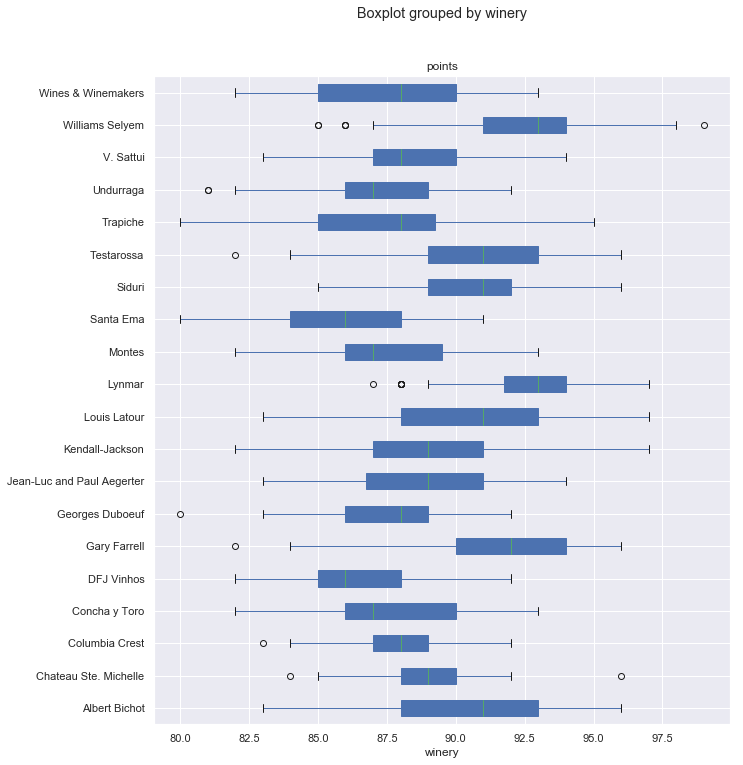

In [12]:
df[df.winery.isin(top20)].boxplot(by='winery', column='points', vert=False, figsize=(10,12), patch_artist=True)

In [14]:
df.groupby('winery')['points'].describe().sort_values('count', ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
winery,,,,,,,,
Wines & Winemakers,201.0,87.691542,2.804350,82.0,85.00,88.0,90.00,93.0
DFJ Vinhos,197.0,86.649746,2.491652,82.0,85.00,86.0,88.00,92.0
Testarossa,193.0,90.751295,2.622084,82.0,89.00,91.0,93.00,96.0
Williams Selyem,190.0,92.668421,2.815406,85.0,91.00,93.0,94.00,99.0
Chateau Ste. Michelle,180.0,88.733333,1.814282,84.0,88.00,89.0,90.00,96.0
Georges Duboeuf,178.0,87.415730,2.315797,80.0,86.00,88.0,89.00,92.0
Louis Latour,177.0,90.559322,2.840082,83.0,88.00,91.0,93.00,97.0
Concha y Toro,152.0,87.585526,2.538300,82.0,86.00,87.0,90.00,93.0
Columbia Crest,144.0,87.868056,2.004354,83.0,87.00,88.0,89.00,92.0


In [14]:
df['year'] = df.title.str.extract('(19|20\d{2})')

In [55]:
df.taster_name.value_counts()

                      23565
Roger Voss            23058
Michael Schachner     13590
Kerin O’Keefe          9643
Virginie Boone         8599
Paul Gregutt           8560
Matt Kettmann          5690
Joe Czerwinski         4634
Sean P. Sullivan       4496
Anna Lee C. Iijima     3986
Jim Gordon             3784
Anne Krebiehl MW       3311
Lauren Buzzeo          1638
Susan Kostrzewa         988
Mike DeSimone           464
Jeff Jenssen            440
Alexander Peartree      373
Carrie Dykes            126
Fiona Adams              23
Christina Pickard         5
Name: taster_name, dtype: int64

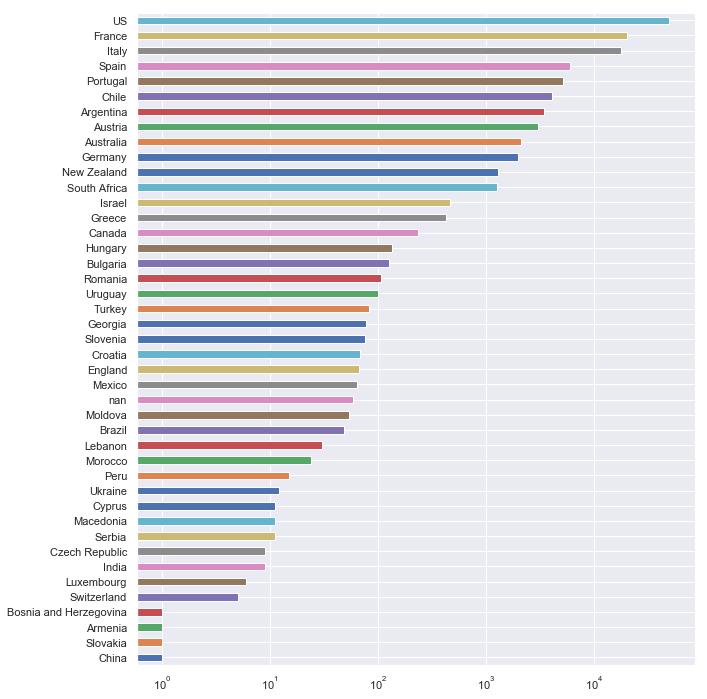

In [5]:
(df.country
   .value_counts(ascending=True, dropna=False)
   .plot.barh(figsize=(10,12), logx=True));

In [7]:
countries = (df.loc[df.country != '', 'country']
               .unique()
               .tolist())

countries_regex = '(' + '|'.join(countries) + ')'
countries_regex

'(US|France|Spain|Italy|Australia|Chile|Germany|Uruguay|Portugal|New Zealand|Israel|Argentina|Austria|Canada|South Africa|Greece|Turkey|Croatia|Hungary|Romania|India|Lebanon|Slovenia|England|Czech Republic|Bulgaria|Cyprus|Moldova|Georgia|Peru|Mexico|Brazil|Morocco|Ukraine|Bosnia and Herzegovina|Macedonia|Switzerland|Serbia|Luxembourg|China|Armenia|Slovakia)'

In [8]:
found_countries = (df.loc[df.country == '', 'description']
                     .str.extract(countries_regex)
                     .dropna())
found_countries

,0
215,South Africa
4152,Hungary
43890,Bulgaria
62502,Uruguay
63324,Switzerland
81016,Bulgaria
105248,Bulgaria


In [9]:
df.loc[found_countries.index, 'country'] = found_countries.values
df.loc[found_countries.index, 'country']

215       South Africa
4152           Hungary
43890         Bulgaria
62502          Uruguay
63324      Switzerland
81016         Bulgaria
105248        Bulgaria
Name: country, dtype: object

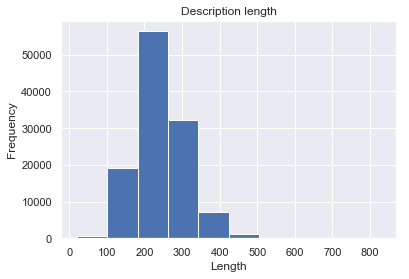

In [10]:
(df.description
   .str.len()
   .plot.hist(title='Description length')
   .set(xlabel="Length"));

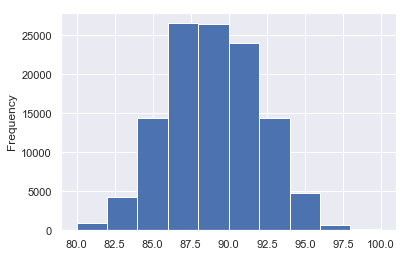

In [75]:
df.points.plot.hist()

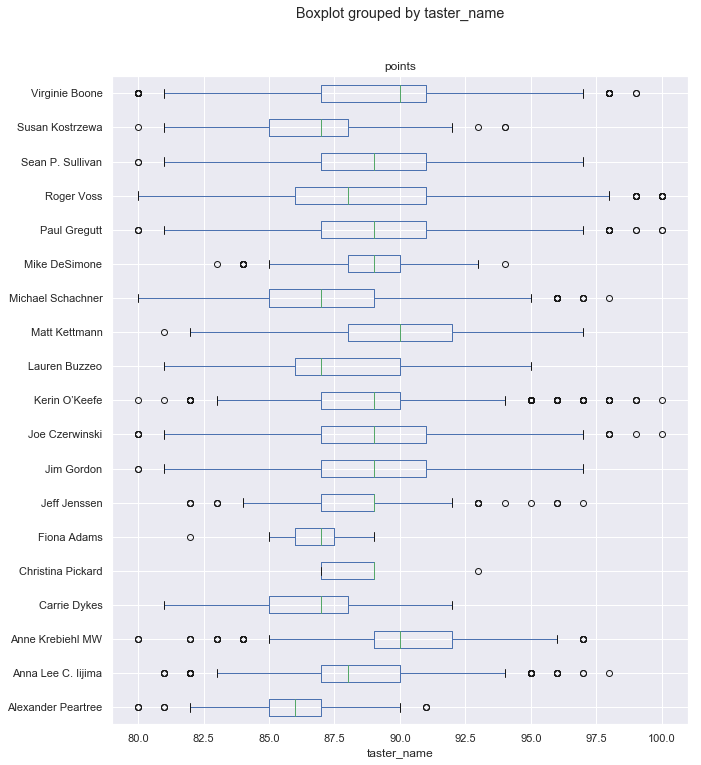

In [22]:
df.boxplot(by='taster_name', column='points', vert=False, figsize=(10,12))

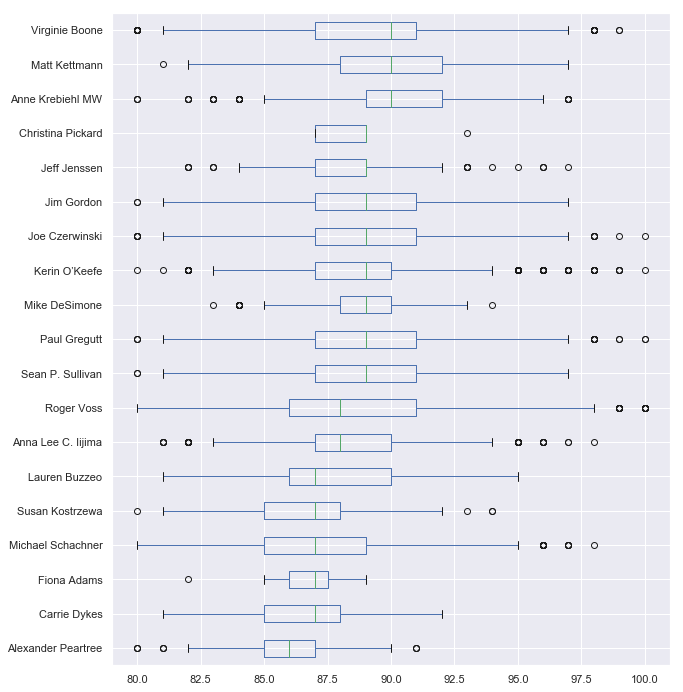

In [47]:
def boxplot_sorted(df, by, column, **kwds):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values()
    df2[meds.index].boxplot(**kwds)
    
boxplot_sorted(df, by='taster_name', column='points', vert=False, figsize=(10,12))

In [49]:
def get_favs(name, min_count=10):
    favs = df[df.taster_name == name].groupby('variety')['points'].describe(percentiles=[.95]).sort_values('95%', ascending=False)
    return favs[favs['count'] >= min_count]

get_favs("Virginie Boone").head(30)

,count,mean,std,min,50%,95%,max
variety,,,,,,,
Cabernet Sauvignon,1656.0,89.533816,3.113571,80.0,90.0,94.00,99.0
Chardonnay,1302.0,89.609063,2.964822,81.0,90.0,94.00,98.0
Pinot Noir,1688.0,90.146327,2.919474,80.0,90.0,94.00,98.0
Malbec,61.0,88.819672,3.143820,80.0,89.0,94.00,95.0
Rhône-style Red Blend,45.0,89.488889,2.599145,85.0,90.0,94.00,94.0
Sparkling Blend,128.0,90.523438,2.384216,85.0,90.0,94.00,98.0
Syrah,291.0,89.570447,2.925103,82.0,90.0,94.00,97.0
Bordeaux-style Red Blend,220.0,89.636364,2.977012,80.0,90.0,94.00,99.0
White Blend,61.0,88.590164,2.900443,80.0,88.0,94.00,95.0


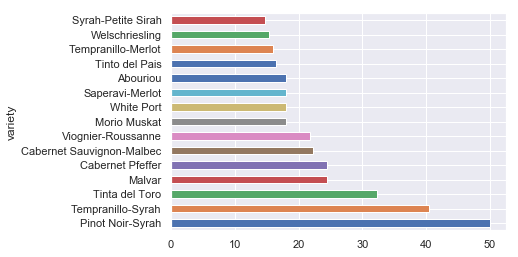

In [68]:
df.groupby(['variety'])['points'].var().dropna().sort_values(ascending=False).head(15).plot.barh();

In [169]:
df.points.describe()

count    116973.000000
mean         88.446539
std           3.038423
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [15]:
df['is_good'] = df.points > 88

In [28]:
from sklearn import metrics

from sklearn.pipeline import make_pipeline, FeatureUnion, make_union
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_predict
from sklearn.externals import joblib
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer


In [45]:
train_df, test_df, train_labels, test_labels = train_test_split(
    df.drop(['is_good', 'price', 'points'], axis=1), 
    df.is_good,
    random_state=3)

In [55]:
model = make_pipeline(
            TfidfVectorizer(),
            SGDClassifier(n_jobs=-1, max_iter=1000))

model.fit(train_df.description, train_labels);

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [58]:
predicted = model.predict(test_df.description)
score = metrics.accuracy_score(test_labels, predicted)
print('\nAccuracy: %0.3f' % score)

print(metrics.classification_report(test_labels, predicted))


Accuracy: 0.818
              precision    recall  f1-score   support

       False       0.82      0.83      0.83     15450
        True       0.81      0.80      0.81     13794

   micro avg       0.82      0.82      0.82     29244
   macro avg       0.82      0.82      0.82     29244
weighted avg       0.82      0.82      0.82     29244



In [25]:
%%time

categorical_features = ['country', 'winery']
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))

model = make_pipeline(
            make_column_transformer(
                ('description', TfidfVectorizer()),
                (categorical_features, categorical_transformer),
                (['year'], make_pipeline(
                    SimpleImputer(strategy='median'),
                    StandardScaler()))),
            SGDClassifier(n_jobs=-1, max_iter=1000))

model.fit(train_df, train_df.is_good)

predicted = model.predict(test_df)

score = metrics.accuracy_score(test_df.is_good, predicted)
print('\nAccuracy: %0.3f' % score)

print(metrics.classification_report(test_df.is_good, predicted))


Accuracy: 0.835
              precision    recall  f1-score   support

       False       0.84      0.85      0.85     15585
        True       0.83      0.82      0.82     13659

   micro avg       0.84      0.84      0.84     29244
   macro avg       0.83      0.83      0.83     29244
weighted avg       0.84      0.84      0.84     29244

Wall time: 39.4 s


In [35]:
def get_failures(model, X, y, cv=3):
    predicted = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)

    print("Confusion matrix (actual x prediction):")
    print(metrics.confusion_matrix(y, predicted))

    fn = X[(y == True) & (predicted == False)]
    fp = X[(y == False) & (predicted == True)]

    return fn, fp

In [36]:
fn, tp = get_failures(model, train_df, train_df.is_good)

Confusion matrix (actual x prediction):
[[39174  7110]
 [ 7615 33830]]


In [53]:
def evaluate(model, X, y):
    predictions = model.predict(X)
    score = metrics.accuracy_score(y, predictions)
    print('\nAccuracy: %0.3f' % score)

    print(metrics.classification_report(y, predictions))

In [62]:
show_most_informative_features(model)

4.0065           2020    -3.3071         simple
3.7578        complex    -2.5879straightforward
3.6609           long    -2.4669          lacks
3.4346          years    -2.2784           soft
3.3440        through    -2.2047           easy
3.2190      delicious    -2.0074      easygoing
3.1742           2022    -1.9752         fruity
3.0117         lovely    -1.9274       everyday
2.8997      beautiful    -1.8983            bit
2.8077        elegant    -1.8497         rustic
2.7705    beautifully    -1.7968         bitter
2.7102       vineyard    -1.7302           lean
2.7024     impressive    -1.7016    dimensional
2.6282           2025    -1.7006         little
2.5595           rich    -1.6846         medium
2.5511        velvety    -1.6054        flavors
2.5387           2019    -1.5933           pair
2.4343           2021    -1.5911           sour
2.3281   concentrated    -1.5715           some
2.2601      excellent    -1.5424     astringent
